In [3]:
#this notebook is for testing purpose


from matplotlib import pyplot as plt
import numpy as np
import dtcwt
import copy 
import numpy
import matplotlib.pyplot as plt_train
import matplotlib.pyplot as plt_test
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
from keras.models import model_from_json
# convert an array of values into a dataset matrix

In [18]:
dataframe = read_csv('inputMod.csv')
dataset = dataframe.values
dataset = dataset.astype('float32')
#dataset = numpy.reshape(dataset,(1948,1))
print(dataset.shape)

(1151, 100)


In [19]:
predIndex=40
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
#print(dataset.shape)
train, test = dataset[0:train_size,:], dataset[train_size+predIndex:train_size+predIndex+1,:]
print(train.shape)
print(test.shape)
train = numpy.reshape(train, (train.shape[0], 1, train.shape[1]))
test = numpy.reshape(test, (test.shape[0], 1, test.shape[1]))
print(train.shape)
print(test.shape)

(805, 100)
(1, 100)
(805, 1, 100)
(1, 1, 100)


In [20]:
dataframeY = read_csv('outputMod.csv')
datasetY = dataframeY.values
datasetY = datasetY.astype('float32')
datasetY = scaler.fit_transform(datasetY)
print(datasetY.shape)

(1151, 20)


In [5]:
# Generate a 300x2 array of a random walk
vecs = np.cumsum(np.random.rand(100,1) - 0.5, 0)
print(vecs.shape)
# 1D transform, 5 levels
transform = dtcwt.Transform1d()
vecs_t = transform.forward(vecs, nlevels=6)
#print vecs_t
# Make Copies
vecs_t1 = copy.deepcopy(vecs_t)
vecs_t2 = copy.deepcopy(vecs_t)
vecs_t3 = copy.deepcopy(vecs_t)
vecs_t4 = copy.deepcopy(vecs_t)
vecs_t5 = copy.deepcopy(vecs_t)

(100, 1)


In [6]:
vecs_recon = transform.inverse(vecs_t)

# Inverse with first component removed
for jj in range(len(vecs_t1.highpasses[0])):
    vecs_t1.highpasses[0][jj] = 0     

vecs_recon1 = transform.inverse(vecs_t1)

# Inverse with first and second component removed
for jj in range(len(vecs_t1.highpasses[1])):
    vecs_t1.highpasses[1][jj] = 0 

vecs_recon2 = transform.inverse(vecs_t1)

# Inverse with first, second and third component removed
for jj in range(len(vecs_t1.highpasses[2])):
    vecs_t1.highpasses[2][jj] = 0 

vecs_recon3 = transform.inverse(vecs_t1)

# Inverse with first, second, third and fourth component removed
for jj in range(len(vecs_t1.highpasses[3])):
    vecs_t1.highpasses[3][jj] = 0 

vecs_recon4 = transform.inverse(vecs_t1)

# Inverse with first, second, third, fourth and fifth component removed
for jj in range(len(vecs_t1.highpasses[4])):
    vecs_t1.highpasses[4][jj] = 0 

vecs_recon5 = transform.inverse(vecs_t1)



In [7]:
print(vecs_recon.shape)
print()

(100,)



In [32]:
print(vecs_recon5.shape)
print(test.shape)

#vecs_recon=np.reshape(vecs_recon5,(20,))
#vecs_recon1=np.reshape(vecs_recon5,(20,))
#vecs_recon2=np.reshape(vecs_recon5,(20,))
#vecs_recon3=np.reshape(vecs_recon5,(20,))
#vecs_recon4=np.reshape(vecs_recon5,(20,))
vecs_recon5=np.reshape(test,(20,))

print(vecs_recon5.shape)

(20,)
(1, 1, 100)


ValueError: cannot reshape array of size 100 into shape (20,)

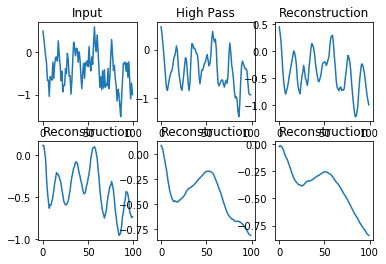

Maximum reconstruction error: 2.111148614286698


In [8]:
plt.subplot(2, 3, 1)
plt.title('Input')
plt.plot(vecs)

# Show the component removed
plt.subplot(2, 3, 2)
plt.title('High Pass')
plt.plot(vecs_recon1)

plt.subplot(2, 3, 3)
plt.title('Reconstruction')
plt.plot(vecs_recon2)

plt.subplot(2, 3, 4)
plt.title('Reconstruction')
plt.plot(vecs_recon3)

plt.subplot(2, 3, 5)
plt.title('Reconstruction')
plt.plot(vecs_recon4)

plt.subplot(2, 3, 6)
plt.title('Reconstruction')
plt.plot(vecs_recon5)

plt.show()

print('Maximum reconstruction error: {0}'.format(np.max(np.abs(vecs - vecs_recon))))

#print ((vecs_t1.highpasses[1]))

In [ ]:
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    #trainPredict = loaded_model.predict(train)
    #keras.layers.Dropout(0.2, noise_shape=None, seed=None)
    #model.add(Dense(50))
    
    model=loaded_model
    model.add(Dropout(0.2, noise_shape=None, seed=None))
    #model.add(Dense(20))
    testPredict = model.predict(test)
    #print(trainPredict)
    #print(testPredict)
    # invert predictions
    
    temptrainPredict = scaler.inverse_transform(trainPredict)
    temptrainY = scaler.inverse_transform(trainY)
    temptestPredict = scaler.inverse_transform(testPredict)
    temptestY = scaler.inverse_transform(testY)
    trainScore = math.sqrt(mean_squared_error(temptrainY[0], temptrainPredict[0]))
    
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(temptestY[0], temptestPredict[0]))
    print('Test Score: %.2f RMSE' % (testScore))